In [1]:
import numpyro.distributions as dist 

In [2]:
normal_channel = dist.Normal

In [3]:
normal_dist = normal_channel((0,1))

In [4]:
dist.Delta(v=(5.0, 5.0, 5.0), event_dim=1)


<numpyro.distributions.distribution.Delta object at 0x111ec1f10 with batch shape () and event shape (3,)>

In [5]:
from dataclasses import dataclass, field
from typing import Optional
from discopy.cat import Category
from discopy.markov import Ty, Box
import numpyro.distributions as dist  # NumPyro's distributions
from functools import partial

# Define some basic types.
R = Ty("R")
N = Ty("N")

# Extend Box to include a probabilistic distribution.
from discopy.markov import Ty
import numpyro.distributions as dist

# Define domain and codomain types
dom = Ty('A')
cod = Ty('B')

# Define the distribution
from discopy.markov import Ty, Box
import numpyro.distributions as dist
from dataclasses import dataclass
from typing import Optional

@dataclass
class ProbBox(Box):
    distribution: Optional[dist.Distribution] = None

    def __init__(self, name: str, dom: Ty, cod: Ty, distribution: Optional[dist.Distribution] = None):
        super().__init__(name, dom, cod)  # Call Box's constructor
        self.distribution = distribution  # Set the distribution attribute

# Define domain and codomain types
dom = Ty('A')
cod = Ty('A')

# Define the distribution
distribution = dist.Normal(0, 1)

# Initialize the ProbBox
prob_box = ProbBox(name='my_prob_box', dom=dom, cod=cod, distribution=distribution)


In [6]:
from functools import partial

In [7]:
from functools import partial
import numpyro.distributions as dist

normal_channel = dist.Normal
# Define a function that takes positional arguments (e.g. loc, scale)
log_prob = lambda *params: normal_channel(*params).log_prob

# Now, log_prob(0, 1) returns a function that takes one argument (the value to evaluate)
print(log_prob(0, 1)(3))  # computes log_prob(3) for Normal(0, 1)


-5.4189386


In [8]:
from functools import partial
import numpyro.distributions as dist

normal_channel = dist.Normal
# Correct lambda: note that x and y are passed as separate arguments.
log_prob = partial(lambda x: normal_channel(*x).log_prob)

# This creates a function log_prob(0,1) that returns a function taking one argument.
print(log_prob(0, 1)(3))  # now works: computes log_prob(3) for Normal(0,1)


TypeError: <lambda>() takes 1 positional argument but 2 were given

In [ ]:
f1 = partial(lambda x: normal_channel(*x).log_prob)
f2 = partial(lambda x: normal_channel(*x).log_prob)

In [ ]:
def channelize_log_prob(dist):
    return lambda *x: partial(dist(*x).log_prob)

channelize_log_prob(normal_channel)(0, 1)(3)  # computes log_prob(3) for Normal(0, 1)

Array(-5.4189386, dtype=float32, weak_type=True)

TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [ ]:
new = (prob_box >> prob_box)

In [ ]:
new.distribution

AttributeError: 'Diagram' object has no attribute 'distribution'

In [ ]:
from discopy.markov import Ty
import numpyro.distributions as dist

# Define domain and codomain types
dom = Ty('A')
cod = Ty('B')

# Define the distribution
distribution = dist.Normal(0, 1)

# Initialize the ProbBox
prob_box = ProbBox(name='my_prob_box', dom=dom, cod=cod, distribution=distribution)


TypeError: ProbBox.__init__() got an unexpected keyword argument 'name'

1 R R
1
2


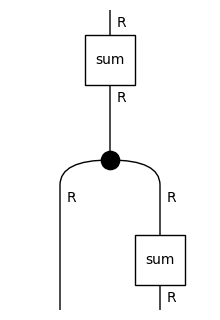

In [2]:

from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)
chaining_sums.log_prob_channel(1)(1,2)
# chaining_sums = chaining_sums >> sum_model
chaining_sums.symbolic_channel.draw()
# print(chaining_sums.log_prob_channel(1)(1,2,3))

In [10]:
from discopy.markov import *
import numpyro.distributions as dist 
x, y = Ty('x'), Ty('y')
f = Box('f', x @ x, y)

@Diagram.from_callable(x @ x, y)
def diagram(a, b):  # Take two wires as inputs
    _ = dist.Delta(b)     # Swap, apply f and discard the result.
    return f(a, b) 

In [11]:
diagram[0]

markov.Diagram(inside=(monoidal.Layer(monoidal.Ty(), markov.Box('f', monoidal.Ty(cat.Ob('x'), cat.Ob('x')), monoidal.Ty(cat.Ob('y'))), monoidal.Ty()),), dom=monoidal.Ty(cat.Ob('x'), cat.Ob('x')), cod=monoidal.Ty(cat.Ob('y')))

In [34]:
sum_model.box_channel

markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')))

1 R R
1.0


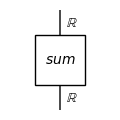

In [ ]:
from discopy.traced import Ty, Box, Category, Functor
from discopy import python



x = Ty('R')
sum = Box('sum', R, R)
copy = Box('', x, x @ x, draw_as_spider=True, color="black")

x = Ty('$\\mathbb{R}$')
f = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={f: lambda x=1.: x},
    cod=Category(python.Ty, python.Function))




phi = f




print(F(phi)(1.0))                   

phi.draw()

In [35]:
sum_model.box_channel

markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')))

In [2]:
sum_model.log_prob_channel(1)

NameError: name 'sum_model' is not defined

In [5]:
sum_model.box_channel

markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R')))

In [8]:
from discopy.traced import Ty, Box, Category, Functor
from discopy import python
from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)

x = Ty('R')
sum_box = sum_model.box_channel
sum_function = sum_model.log_prob_channel
copy = Box('', x, x @ x, draw_as_spider=True, color="black")

# x = Ty('$\\mathbb{R}$')
# sum = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={sum_box: sum_function},
    cod=Category(python.Ty, python.Function))




phi = sum_box



print(sum_box.inside)
print(F(phi)(1.0))  

1 R R
(monoidal.Layer(monoidal.Ty(), markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R'))), monoidal.Ty()),)
functools.partial(<function sum at 0x17234d300>, 1.0)


In [13]:
from discopy.markov import Ty, Box, Category, Functor, Copy
from discopy import python
from stat_games.open_model import OpenModel
from discopy.markov import Ty
from functools import partial
def sum(x,y):
        print(y)
        return x+y
channelized_sum = lambda x: partial(sum,x)
R = Ty('R')
sum_model = OpenModel(dom=R, cod=R, log_prob_channel=channelized_sum, channel_name="sum")
chaining_sums = sum_model >> sum_model
sum_model.log_prob_channel(1)

x = Ty('R')
sum_box_chained = chaining_sums.box_channel
sum_function_chained = chaining_sums.log_prob_channel
copy = Box('', x, x @ x, draw_as_spider=True, color="black")

# x = Ty('$\\mathbb{R}$')
# sum = Box('$sum$', x , x          )
# >>> g = Box('$\\frac{1 + \\sqrt{5}}{2}$', Ty(), x)
F = Functor(
    ob={x: (float, )},
    ar={sum_box: sum_function,
        Copy(x, 2): lambda x: (x,x)},
    cod=Category(python.Ty, python.Function))




phi = sum_box_chained



print(sum_box.inside)
print(F(phi)(1.0))  

1 R R
(monoidal.Layer(monoidal.Ty(), markov.Box('sum', monoidal.Ty(cat.Ob('R')), monoidal.Ty(cat.Ob('R'))), monoidal.Ty()),)
(functools.partial(<function sum at 0x171f5a660>, 1.0), functools.partial(<function sum at 0x171f5a660>, functools.partial(<function sum at 0x171f5a660>, 1.0)))


In [ ]:
?Box

Init signature: Box(name: 'str', dom: 'Ty', cod: 'Ty', **params)
Docstring:     
A traced box is a monoidal box in a traced diagram.

Parameters:
    name (str) : The name of the box.
    dom (monoidal.Ty) : The domain of the box, i.e. its input.
    cod (monoidal.Ty) : The codomain of the box, i.e. its output.
File:           /opt/miniconda3/envs/blr/lib/python3.12/site-packages/discopy/traced.py
Type:           ABCMeta
Subclasses:     Trace, Box